In [25]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn.model_selection import ShuffleSplit
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

In [3]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Training set accuracy:
Percent Type I errors: 0.04650845608292417
Percent Type II errors: 0.17607746863066012

Test set accuracy:
Percent Type I errors: 0.06257668711656442
Percent Type II errors: 0.18527607361963191


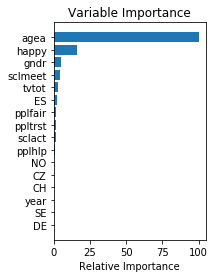

In [4]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [5]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [6]:
df.describe()

,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
count,8.147000e+03,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000
mean,4.022622e+04,6.500307,3.818584,5.574936,6.005155,5.321468,7.708482,5.215908,2.755984,1.496379,47.262182,1.384681
std,6.320721e+05,0.500031,2.008937,2.215745,2.120127,2.166217,1.720839,1.438792,0.901406,0.500018,18.316890,0.486550
min,1.000000e+00,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,1.000000
25%,1.063000e+03,6.000000,2.000000,4.000000,5.000000,4.000000,7.000000,4.000000,2.000000,1.000000,33.000000,1.000000
50%,1.749000e+03,7.000000,4.000000,6.000000,6.000000,5.000000,8.000000,6.000000,3.000000,1.000000,47.000000,1.000000
75%,2.778000e+03,7.000000,5.000000,7.000000,8.000000,7.000000,9.000000,6.000000,3.000000,2.000000,61.000000,2.000000
max,1.100143e+07,7.000000,7.000000,10.000000,10.000000,10.000000,10.000000,7.000000,5.000000,2.000000,114.000000,2.000000


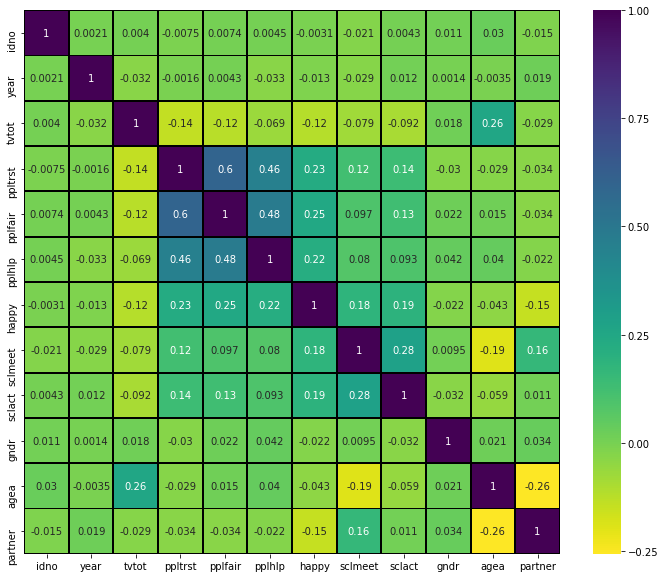

In [13]:
plt.figure(figsize=(12,10))
matrix = sns.heatmap(df.corr(),annot=True,linecolor='k',linewidth=1,cmap='viridis_r')

- correlation heatmap shows low multicollinearity between features.
- looks like we could combine 'ppltrst','pplfair','pplhlp' features into new overall plp variable

In [65]:
new_df = pd.DataFrame(df)
new_df['ppl_tfh'] = (df['ppltrst'] + df['pplfair'] + df['pplhlp'])/3
new_df = new_df.drop(['ppltrst','pplfair','pplhlp'],1)

In [66]:
new_df['gndr'] = df['gndr'] - 1

In [67]:
new_df.head()

,cntry,idno,year,tvtot,happy,sclmeet,sclact,gndr,agea,partner,ppl_tfh
0,CH,5.0,6,3.0,8.0,5.0,4.0,1.0,60.0,1.0,6.000000
1,CH,25.0,6,6.0,9.0,3.0,2.0,1.0,59.0,1.0,5.666667
2,CH,26.0,6,1.0,7.0,6.0,3.0,0.0,24.0,2.0,8.000000
3,CH,28.0,6,4.0,10.0,6.0,2.0,1.0,64.0,1.0,6.333333
4,CH,29.0,6,5.0,8.0,7.0,2.0,1.0,55.0,1.0,6.000000


In [68]:
# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = new_df['partner'] - 1
X = new_df.drop(['partner', 'cntry', 'idno'],1)

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

## New Model
- 1000 interations, max depth of 4, 16 leafs
- sub-sampling by shuffled cross-validation

In [69]:
params = {'n_estimators': 1000,
          'max_depth': 4,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)
cv = ShuffleSplit(n_splits=10, test_size=0.5, random_state = None)
scores = cross_val_score(clf, X_train, y_train, cv=cv)

y_predicted = clf.predict(X_train)

# Accuracy tables.
table = pd.crosstab(y_train, y_predicted, margins=True)

tI_errors = table.loc[0.0,1.0] / table.loc['All','All']
tII_errors = table.loc[1.0,0.0] / table.loc['All','All']

print((
    'Cross-Validation Accuracy:\n'
    'Type I Error Rate: {:.2%}.\n'
    'Type II Error Rate: {:.2%}.\n'
).format(tI_errors, tII_errors))

Cross-Validation Accuracy:
Type I Error Rate: 1.50%.
Type II Error Rate: 9.30%.



In [70]:
predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Training set accuracy:
Percent Type I errors: 0.015002727768685215
Percent Type II errors: 0.09301691216584834

Test set accuracy:
Percent Type I errors: 0.09693251533742331
Percent Type II errors: 0.16809815950920245


### While type 2 errors fell from the original model by .02, type 1 errors rose by .03 in the testing set.

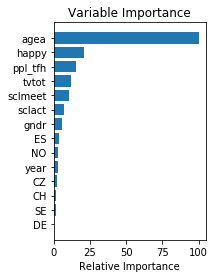

In [71]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

- as before we see age represent the most important feature to determine if a person has a partner.

- lets try a different loss function

In [73]:
params = {'n_estimators': 1000,
          'max_depth': 4,
          'loss': 'exponential'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)
cv = ShuffleSplit(n_splits=10, test_size=0.5, random_state = None)
scores = cross_val_score(clf, X_train, y_train, cv=cv)

y_predicted = clf.predict(X_train)

# Accuracy tables.
table = pd.crosstab(y_train, y_predicted, margins=True)

tI_errors = table.loc[0.0,1.0] / table.loc['All','All']
tII_errors = table.loc[1.0,0.0] / table.loc['All','All']

print((
    'Cross-Validation Accuracy:\n'
    'Type I Error Rate: {:.2%}.\n'
    'Type II Error Rate: {:.2%}.\n'
).format(tI_errors, tII_errors))

Cross-Validation Accuracy:
Type I Error Rate: 1.62%.
Type II Error Rate: 10.19%.



In [74]:
predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Training set accuracy:
Percent Type I errors: 0.01623022367703219
Percent Type II errors: 0.1018821603927987

Test set accuracy:
Percent Type I errors: 0.10429447852760736
Percent Type II errors: 0.17177914110429449


- again we see type 2 testing set errors decrease for a rise in type 1 errors. 